In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sn
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/auction_nostats.csv')

In [3]:
df

,player_pkey,Player,Team,Year,isOverseas,isBatsman,isBowler,isWicketKeeper,isCapped,UncappedAndPerformed,base,Amount
0,219,Aaron Finch,Royal Challengers Bangalore,2020,1,1,0,0,1,0,2.0,4.4
1,217,Abdul Samad,Sunrisers Hyderabad,2020,0,1,1,0,0,0,0.2,0.2
2,1944,Abhijeet Tomar,Kolkata Knight Riders,2022,0,1,0,0,0,0,0.2,0.4
3,0,Abhinav Sadarangani,Gujarat Titans,2022,0,1,0,0,0,0,0.2,2.6
4,76,Abhishek Sharma,Sunrisers Hyderabad,2022,0,1,1,0,0,1,0.2,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...
317,2267,Yash Dayal,Gujarat Titans,2022,0,0,1,0,0,0,0.2,3.2
318,0,Yash Dhull,Delhi Capitals,2022,0,1,1,0,0,0,0.2,0.5
319,230,Yashasvi Jaiswal,Rajasthan Royals,2020,0,1,1,0,0,1,1.0,2.4
320,2579,Yudhvir Charak,Mumbai Indians,2021,0,1,1,0,0,0,0.2,0.2


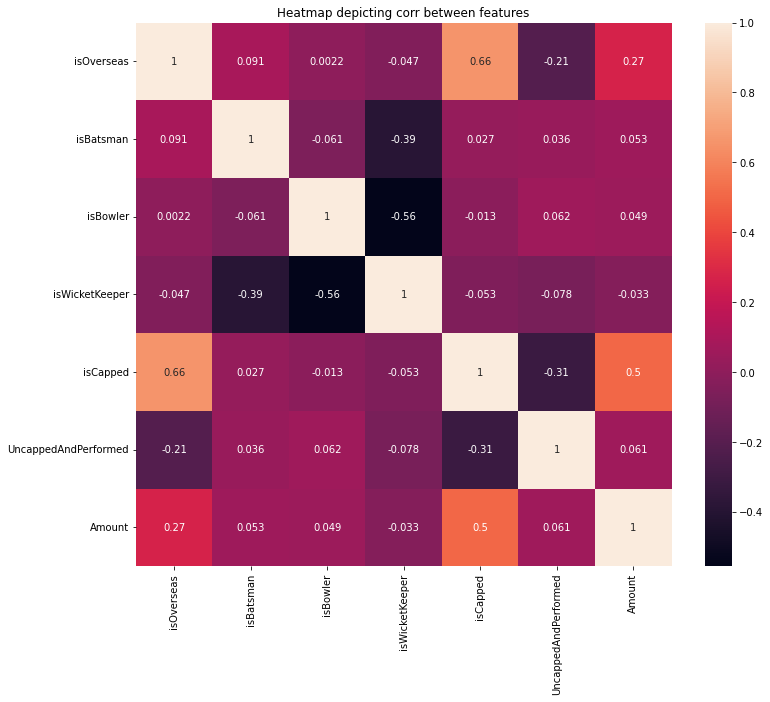

In [4]:
cols = ['isOverseas', 'isBatsman', 'isBowler', 'isWicketKeeper', 'isCapped', 'UncappedAndPerformed', 'Amount']
df = df[cols]
plt.figure(figsize=(12,10))
x=df
sn.heatmap(x.corr(), annot = True);
plt.title("Heatmap depicting corr between features");

In [5]:
models = [LinearRegression(), BayesianRidge(), SVR(C=1.0, epsilon=0.2), 
          XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8),
         RandomForestRegressor()]

In [6]:
feat = ['isOverseas', 'isBatsman', 'isBowler', 'isWicketKeeper', 'isCapped', 'UncappedAndPerformed']
X = df[feat]
y= df['Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
result = pd.DataFrame()
for model in models:
    model.fit(X_train, y_train)
    a = model.score(X_train, y_train)
    b = model.score(X_test, y_test)
    result = result.append({'name': str(model), 'Train': a, 'Test': b}, ignore_index=True)

In [8]:
result

,name,Train,Test
0,LinearRegression(),0.336455,0.232122
1,BayesianRidge(),0.335068,0.227194
2,SVR(epsilon=0.2),0.213632,0.044700
3,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.372767,0.169545
4,RandomForestRegressor(),0.371726,0.180936


In [9]:
est = sm.OLS(y_train, X_train)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Amount   R-squared (uncentered):                   0.574
Model:                            OLS   Adj. R-squared (uncentered):              0.564
Method:                 Least Squares   F-statistic:                              56.35
Date:                Thu, 09 Jun 2022   Prob (F-statistic):                    8.51e-44
Time:                        14:03:34   Log-Likelihood:                         -620.16
No. Observations:                 257   AIC:                                      1252.
Df Residuals:                     251   BIC:                                      1274.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------